# <center> **STOCK AND PORTFOLIO PERFORMANCE** <center/>


This is my individual project for the Computer Programming course, part of the Master of Applied Data Science program at the University of Canterbury.

## **1. How to use program**

### 1.1 Program objectives

This program is built with 2 major objectives: (i) analyzing individual stock performance and (ii) analyzing stock portfolio performance.

* Objective 1: Analyzing the performance of individual stocks includes creating the interactive charts of their historical prices over the time; calculating their monthly returns, annualized returns, the standard deviation of returns and comparing their performance.

* Objective 2: Analyzing the performance of investment portfolios includes creating the equally weighted portfolio; building a function to calculate the annualized return and risk of a portfolio; creating randomly weighted porfolios; and finding the best performance portfolio (the optimal portfolio) to give advice for investors.

### 1.2 Methods

#### 1.2.1 Data extraction

A well-diversified stock portfolio should comprise between 30 and 40 stocks, as suggested by Statman (1987). To mitigate around 90% of diversifiable risk, using standard deviation as a risk measure, professional portfolio managers should maintain holdings of 49 stocks in the United States, 43 in the United Kingdom, 39 in Japan, 40 in Canada, and 38 in Australia for optimal diversification (Alexeeva, V., & Francis, T., 2012). Generally, owning a portfolio of 10 or more stocks, especially from diverse sectors or industries, is considerably less risky than owning only two stocks, notes Somer Anderson (2022). The selection of these stocks typically focuses on market capitalization, prioritizing the largest companies (Simply Wall St, 2024). Therefore, for this program, the top ten stocks with the highest market capitalization from the New Zealand Stock Exchange were selected for analysis. The stock list is presented in Table 1 below. After defining the stock list, the historical price dataset will be extracted from Yahoo!Finance. 

**Table 1. Top ten stocks with highest market capitalization from New Zealand Stock Exchange**

*Source: Yahoo!Finance, updated as of 20 May 2024*

No. | Stock code | Company name | Industry | Business field | Market Capitalization (Billion NZD)
----|------------|--------------|----------|----------------|-------------------------------------
1   | FPH.NZ | Fisher & Paykel Healthcare Corporation Ltd. | Heathcare | Medical device products and systems for use in both hospital and homecare settings | 16.848
2   | MEL.NZ | Meridian Energy Ltd. | Utilities | Generating, trading, and retailing of electricity to residential, business, and industrial customers in New Zealand, Australia, and the United Kingdom | 16.049
3   | AIA.NZ | Auckland International Airport Ltd. | Transportation | Airport facilities, supporting infrastructure and aeronautical services in Auckland, New Zealand | 11.057
4   | IFT.NZ | Infratil Ltd. | Capital Goods | Infrastructure investment | 9.366
5   | MCY.NZ | Mercury Ltd. | Utilities | Electricity (from renewable sources, such as hydro, geothermal and wind), gas, broadband and mobile services | 9.131
6   | SPK.NZ | Spark New Zealand Ltd. | Telecom | Telecommunications and digital services | 7.619
7   | CEN.NZ | Contact Energy Ltd. | Utilities | Generating and selling electricity and natural gas in New Zealand | 6.968
8   | EBO.NZ | Ebos Group Ltd.| Heathcare | Marketing, wholesale, and distribution of healthcare, medical, pharmaceutical, and animal care products in Australia, New Zealand, and Southeast Asia | 6.796
9   | MFT.NZ | Mainfreight Ltd. | Transportation | Providing supply chain logistics services in New Zealand, Australia, the Americas, Europe, and Asia | 6.737
10  | ATM.NZ | The A2 Milk Company Ltd. | Food, Beverage and Tobacco | Selling A2 protein type branded milk and related products in Australia, New Zealand, China, other Asian countries, and the United States | 5.342

Related to the **frequency of measurement**, although the stock prices are collected daily, the data sampling of stock's return in this program uses **monthly observation**. According to Koller T., Goedhart M. and Wessels D. (2010), monthly data should be used than daily and weekly returns because high-frequency periods will lead to systematic biases.

In term of the **length of measurement period**, these authors also suggest that the data period for regression should include at least 60 observations, equivalently five years of monthly as an imitation from results of many empirical tests. Hence, this program will utilize the **10-year estimation period** *from 2015 to first four months of 2024*.

For calculating stock returns, the adjusted closing price (**Adj Close**) is chosen than the closing price (**Close**). It is because the closing price simply refers to the share price at the end of the trading day, while the adjusted closing price adjusts for dividends, stock splits, and new stock offerings. Hence, the adjusted closing price is a more accurate reflection of a stock's value after considering any corporate actions.

#### 1.2.2 Measure stock performance

**a. Visualize historical stock prices**

The stocks started at different price levels in 2015, so it is quite hard to compare the performance of the stocks. To better compare the stocks based on their historical prices, they should all start at the same base level, for example, at 100. According to Asesh, A. (2022), normalization techniques are acknowledged to play a crucial role in enhancing classification accuracy when dealing with multivariate data sets. This is particularly evident when working with data originating from two distributions characterized by significantly different means and variances. Proper normalization is essential to ensure that each variable does not unduly influence the prediction process. Hence, to have a better visualization based on historical prices, a value of 100 is started at the first observation of dataset for each stock and all other future values adjusted to the base value accordingly. This will be performed with Pandas, a vectorized operation, all elements in a panel series divided by one scalar value.

**b. Measure stock performance based on mean returns and standard deviation returns**

The stock performance can be measured based on its return and risk. Rates of return normally incorporate the income received from the underlying asset, such as interest from bonds, or dividends from stocks. There are two ways to measure the stock’s return, with *R* denoting for stock return, *P* denoting for stock price and *d* denoting for stock dividend.

> The simple return:  ${R_{t+1}}=\frac{P_{t+1}-P_{t}+d_{t+1}}{P_{t}}$

> The continuously compounded return or log return: ${R_{t+1}}={ln[\frac{P_{t+1}+d_{t+1}}{P_{t}}]}$

The conclusion from the literature review draw that value calculated from continuously compounded returnor log return is lower and more exact than simple return. Brailsford, Faff and Oliver (1997) indicates that the continuously compounded return has advantages over the simple one. However, related to the calculation of portfolio's return, the simple return of portfolio over any time period is the weighted sum of all the simple returns from each of the security. Meanwhile, the same method cannot be applied for log returns, as it would yield an inaccurate result. This is because log returns represent a continuously compounded rate over time. In the context of different stocks within the same time period, there is no compounding effect at play. To accurately compute the portfolio return for contributions from securities within the same time frame, it is advisable to use **simple returns** instead.

In term of risk, the risk or the volatility is calculated as the sample standard deviation of the simple stock returns. Annualized volatility is used to quantify the risk of an investment or a portfolio by indicating how much the value of an investment is likely to fluctuate over a given period. The higher the annualized volatility, the greater the risk of the investment.

The formula to convert from monthly mean return and standard deviation return to annual numbers are as below:

> For annualized mean return: $return_{annual}=return_{monthly}*12$

> For annualized standard deviation return: $std_{annual}=std_{monthly}*Sqrt(12)$


**c. Compare stock performance by applying Mean - Variance approach**

Acording to Thompson, N. (1993), the **Mean-Variance approach** to portfolio analysis or Markowitz’s portfolio theory operates on the fundamental principle that when investors allocate their wealth among various assets, investors will consider not only the expected returns associated with different portfolio combinations but also the level of risk associated with each holding. The Mean - Variance approach is simply based on only expected return and standard deviation of the securities in making investment decisions. With only the popularised price of stock in the stock exchange market as input, investors is able to analyse the mean of return and the risk of all portfolios for their investment decisions. 

To find the best stock/portfolio by Mean - Variance approach, assumed that our risky assets consist of a risk-free asset and stock funds. The capital allocation line (CAL) is the straight line going from the risk-free rate through any portfolio in the minimum variance portfolio. With a risk-free rate as an intercept, the slope of the CAL combining risk-free asset and the minimum variance portfolios is: $\frac{E(R_{P})-R_{f}}{\sigma_{P}}$. It is also called the **Sharpe ratio** which measures the increase in the expected return per unit of additional standard deviation or incremental return per incremental risk. It is maximum at the tangency point of CAL and the minimum variance portfolios. In other words, this tangency point is the optimum portfolio. (Bodie, Kane, Marcus, 2011).

In fact, it is too difficult to find a pure average risk-free rate reflecting a long time horizon without the impact of inflation and interest rate riskiness. In New Zealand financial market, there are treasury notes such as 5-year and 10-year government bond which are considered as the risk-free assets to estimate the risk-free rate. In this program, the 10-year government bond is selected to calculate the excess returns because it is consistent with 10-year length of data’s measurement period. The average yearly rates of 10-year bonds from 2015 to April 2024 is 2.8% as caculated from the dataset provided by Reserve Bank of New Zealand. (Reserve Bank of New Zealand, 2024)

### 1.3  Program tools

For this program, the following tools are utilized to extract stock prices, visualize graphics and measure stock/portfolio performance. Firstly, I chose Python and `Jupyter notebook` as the primary coding environment. Jupyter is an interactive, web-based notebook that enables users to write Python code while simultaneously creating readable document. Secondly, the `yfinance` package is installed and imported as `yf` to provide a reliable, threaded, and Pythonic way to download historical stock price from Yahoo!Finance. Thirdly, the `datetime` library is used to import classes that can manipulate dates and times. Fourthly, `matplotlib.pyplot` is imported as `plt` to enable plotting in a style similar to Matlab. Building on matplotlib, `Seaborn` offers a high-level interface for creating attractive and informative statistical graphics. Fifthly, for interactive visualizations, the `plotly` and `cufflinks` packages are installed to enable dynamic plotting capabilities. Lastly, the `Pandas` library, which is pre-installed in Jupyter notebooks, is imported to facilitate data manipulations alongside matplotlib visualizations and NumPy for mathematical operations.

## **2. The development process**

### 2.1 Set-up and Imports

In [1]:
%%capture
# Install the yfinance package to fetch financial data
!pip install yfinance

In [2]:
%%capture
# Install Plotly to create interactive plots 
!pip install plotly --upgrade

In [3]:
%%capture
conda install -c conda-forge python-cufflinks # Install Cufflinks to create interactive plots 

In [4]:
# Import needed libraries
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import plotly
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.tools as tls
import cufflinks as cf
from scipy.stats import norm
import seaborn as sns
sns.set_theme()

### 2.2 Extract historical stock prices from Yahoo!Finance

The monthly historical stock prices are extracted from Yahoo!Finance from January 2015 to April 2024.

In [5]:
ticker = ['FPH.NZ', 'MEL.NZ', 'AIA.NZ', 'IFT.NZ', 'MCY.NZ', 
          'SPK.NZ', 'CEN.NZ', 'EBO.NZ', 'MFT.NZ', 'ATM.NZ']
price = yf.download(ticker, start = datetime(2015,1,1), end = datetime(2024,5,1), interval = '1mo')
display(price.head(3))
display(price.tail(3))

[*********************100%%**********************]  10 of 10 completed


Adj Close                                                           \
              AIA.NZ ATM.NZ    CEN.NZ    EBO.NZ    FPH.NZ    IFT.NZ    MCY.NZ   
Date                                                                            
2015-01-01  3.793540   0.54  3.994765  6.966588  5.366486  2.268976  2.358872   
2015-02-01  3.708292   0.57  3.491887  7.607955  5.919554  2.254616  2.400995   
2015-03-01  3.836165   0.56  3.378881  7.888091  5.686229  2.283337  2.176341   

                                           ...    Volume                      \
              MEL.NZ     MFT.NZ    SPK.NZ  ...    AIA.NZ    ATM.NZ    CEN.NZ   
Date                                       ...                                 
2015-01-01  1.915247  13.535092  2.360906  ...  15627602   3000999   8974158   
2015-02-01  2.117478  13.704282  2.339444  ...  23431714  28383311  11044200   
2015-03-01  2.002485  13.086744  2.131971  ...  31412504  16965711  10678236   

                                                                      \
             EBO.NZ    FPH.NZ    IFT.NZ    MCY.NZ    MEL.NZ   MFT.NZ   
Date                                                                   
2015-01-01  1140197  14835547  26520363  25229928  47177951   646484   
2015-02-01  2203168  14777553   6678594  26942963  53188136  1502426   
2015-03-01  2448325  21707676  10523194  53788294  56612702  1479917   

                       
               SPK.NZ  
Date                   
2015-01-01  108710399  
2015-02-01  121547153  
2015-03-01  218640646  

[3 rows x 60 columns]

Adj Close                                                          \
              AIA.NZ ATM.NZ    CEN.NZ     EBO.NZ     FPH.NZ IFT.NZ    MCY.NZ   
Date                                                                           
2024-02-01  8.032997   6.20  7.931544  36.374550  24.500000  10.31  6.590355   
2024-03-01  8.280929   6.78  8.650000  34.250000  25.650000  10.89  6.837000   
2024-04-01  7.850000   6.69  8.670000  35.060001  28.469999  10.92  6.380000   

                                           ...    Volume                      \
              MEL.NZ     MFT.NZ    SPK.NZ  ...    AIA.NZ    ATM.NZ    CEN.NZ   
Date                                       ...                                 
2024-02-01  5.918190  67.760002  4.933110  ...  26363509  13829490   9853583   
2024-03-01  5.848913  69.699997  4.636345  ...  26669746  11983249  14188161   
2024-04-01  6.000000  68.000000  4.770000  ...  13438035   6171307   9327780   

                                                                               
             EBO.NZ   FPH.NZ    IFT.NZ    MCY.NZ    MEL.NZ   MFT.NZ    SPK.NZ  
Date                                                                           
2024-02-01  2709313  7113818   9032494  12950014  26148410   741821  31138711  
2024-03-01  5115282  9357202  11860676  11481244  24363989  1260210  59886857  
2024-04-01  4104429  8534714   7269587   9569042  21350990   937729  37298799  

[3 rows x 60 columns]

Then, the dataset is refined to include only the adjusted closing prices of stocks.

In [6]:
adj_close = price.loc[:, "Adj Close"].copy()
display(adj_close.head(3))
display(adj_close.tail(3))

,AIA.NZ,ATM.NZ,CEN.NZ,EBO.NZ,FPH.NZ,IFT.NZ,MCY.NZ,MEL.NZ,MFT.NZ,SPK.NZ
Date,,,,,,,,,,
2015-01-01,3.793540,0.54,3.994765,6.966588,5.366486,2.268976,2.358872,1.915247,13.535092,2.360906
2015-02-01,3.708292,0.57,3.491887,7.607955,5.919554,2.254616,2.400995,2.117478,13.704282,2.339444
2015-03-01,3.836165,0.56,3.378881,7.888091,5.686229,2.283337,2.176341,2.002485,13.086744,2.131971


,AIA.NZ,ATM.NZ,CEN.NZ,EBO.NZ,FPH.NZ,IFT.NZ,MCY.NZ,MEL.NZ,MFT.NZ,SPK.NZ
Date,,,,,,,,,,
2024-02-01,8.032997,6.20,7.931544,36.374550,24.500000,10.31,6.590355,5.918190,67.760002,4.933110
2024-03-01,8.280929,6.78,8.650000,34.250000,25.650000,10.89,6.837000,5.848913,69.699997,4.636345
2024-04-01,7.850000,6.69,8.670000,35.060001,28.469999,10.92,6.380000,6.000000,68.000000,4.770000


### 2.3 Analyze the performance of individual stocks

#### 2.3.1 Visualize historical stock prices over the time

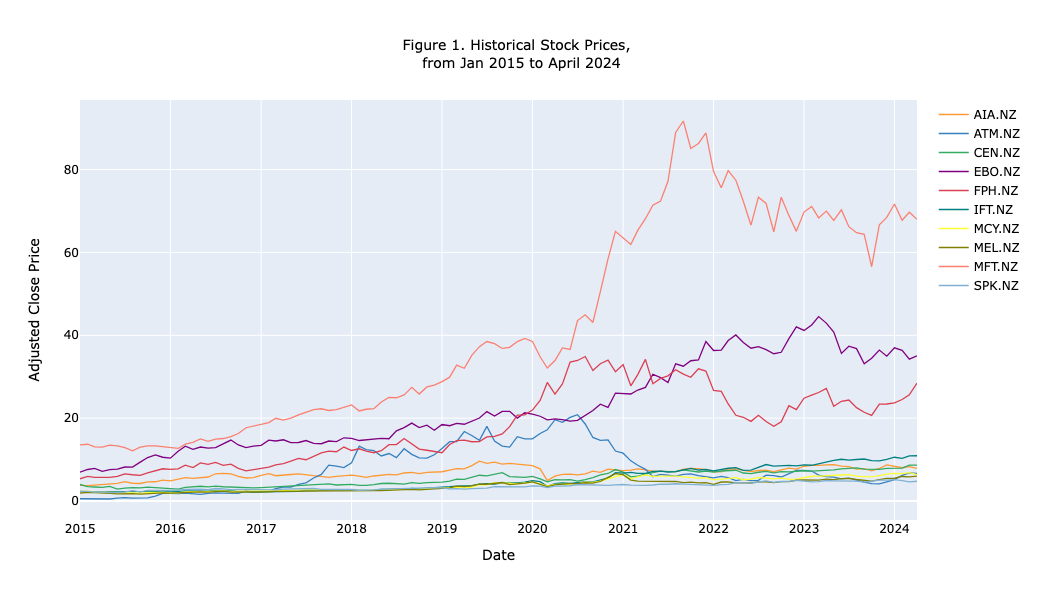

In [7]:
# Interactive plot for historical stock prices.
cf.set_config_file(offline = True)
adj_close.iplot(
    kind='line',
    layout=cf.Layout(
        title=dict(text='Figure 1. Historical Stock Prices, <br> from Jan 2015 to April 2024', x=0.5, font=dict(size=14)),
        xaxis=dict(title='Date', titlefont=dict(size=14)),
        yaxis=dict(title='Adjusted Close Price', titlefont=dict(size=14)),
        width=900,  
        height=600,  
        font=dict(size=12, color='black')  
    )
)

**Normalizing Time Series to a Base Value (100)**

The stocks start at different price levels in 2015, so it is quite hard to compare the performance of the stocks. For example, it is difficult to assert that Mainfreight Ltd. (MFT.NZ) was the best performing stock or Spark (SPK.NZ) was the worst performing stock. To better compare the stocks, they should all start at the same base level, for example, at 100. A base value of 100 is started at the first observation of dataset for each stock and all other future values adjusted to the base value accordingly.

In [8]:
# Show the first observation for each stock.
adj_close.iloc[0]

AIA.NZ     3.793540
ATM.NZ     0.540000
CEN.NZ     3.994765
EBO.NZ     6.966588
FPH.NZ     5.366486
IFT.NZ     2.268976
MCY.NZ     2.358872
MEL.NZ     1.915247
MFT.NZ    13.535092
SPK.NZ     2.360906
Name: 2015-01-01 00:00:00, dtype: float64

In [9]:
# Normalize stock prices to a base value of 100.
norm = adj_close.div(adj_close.iloc[0]).mul(100)
display(norm.head(3))
display(norm.tail(3))

,AIA.NZ,ATM.NZ,CEN.NZ,EBO.NZ,FPH.NZ,IFT.NZ,MCY.NZ,MEL.NZ,MFT.NZ,SPK.NZ
Date,,,,,,,,,,
2015-01-01,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-02-01,97.752818,105.55555,87.411575,109.206328,110.305965,99.367097,101.785730,110.559032,101.250006,99.090944
2015-03-01,101.123619,103.70370,84.582737,113.227459,105.958139,100.632914,92.261932,104.554932,96.687514,90.303058


,AIA.NZ,ATM.NZ,CEN.NZ,EBO.NZ,FPH.NZ,IFT.NZ,MCY.NZ,MEL.NZ,MFT.NZ,SPK.NZ
Date,,,,,,,,,,
2024-02-01,211.754644,1148.148067,198.548468,522.128620,456.537102,454.390022,279.385872,309.004034,500.624601,208.949847
2024-03-01,218.290267,1255.555545,216.533402,491.632344,477.966388,479.952211,289.841928,305.386912,514.957675,196.379873
2024-04-01,206.930727,1238.888850,217.034069,503.259289,530.514734,481.274381,270.468270,313.275546,502.397754,202.041049


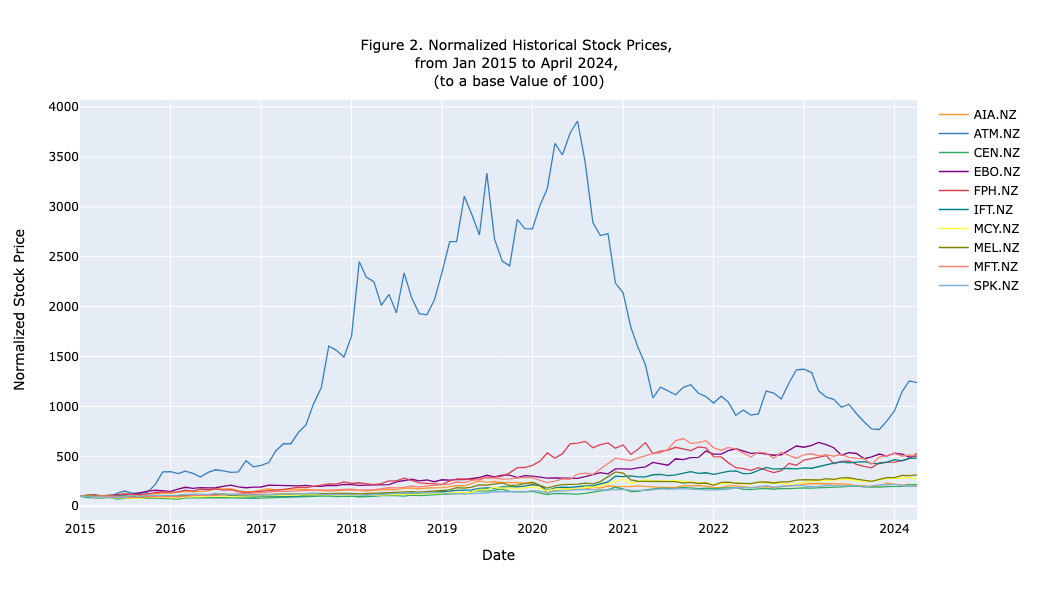

In [10]:
# Interactive plot for historical normalized stock prices.
norm.iplot(
    kind='line',
    layout=cf.Layout(
        title=dict(text='Figure 2. Normalized Historical Stock Prices, <br>from Jan 2015 to April 2024, <br>(to a base Value of 100)', x=0.5, font=dict(size=14)),
        xaxis=dict(title='Date', titlefont=dict(size=14)),
        yaxis=dict(title='Normalized Stock Price', titlefont=dict(size=14)),
        width=900,  
        height=600,  
        font=dict(size=12, color='black')  
    )
)

Since all stocks start at the value of 100, it is better to compare the performance of the stocks. Visually, A2 (ATM.NZ) appears to be the best performing stock over the observed period. However, a thorough analysis involving the examination of mean returns and standard deviation returns is necessary to substantiate this observation.

#### 2.3.2 Measure the individual stock performance with mean returns and standard deviation returns.

**a. Measure individual stock performance**

First of all, we will create the dataframe showing the monthly stock returns and dropping null values if any. The `pct_change()` is applied to calculate the simple returns from historical prices: ${R_{t+1}}=\frac{P_{t+1}-P_{t}+d_{t+1}}{P_{t}}$

In [11]:
df_return = adj_close.pct_change().dropna()
display(df_return.head(3))
display(df_return.tail(3))

,AIA.NZ,ATM.NZ,CEN.NZ,EBO.NZ,FPH.NZ,IFT.NZ,MCY.NZ,MEL.NZ,MFT.NZ,SPK.NZ
Date,,,,,,,,,,
2015-02-01,-0.022472,0.055556,-0.125884,0.092063,0.103060,-0.006329,0.017857,0.105590,0.012500,-0.009091
2015-03-01,0.034483,-0.017544,-0.032362,0.036821,-0.039416,0.012739,-0.093567,-0.054307,-0.045062,-0.088685
2015-04-01,0.041337,-0.071429,-0.032954,-0.090322,-0.012158,-0.018868,-0.012772,-0.000517,-0.004525,0.026054


,AIA.NZ,ATM.NZ,CEN.NZ,EBO.NZ,FPH.NZ,IFT.NZ,MCY.NZ,MEL.NZ,MFT.NZ,SPK.NZ
Date,,,,,,,,,,
2024-02-01,-0.039715,0.203883,0.000000,-0.015979,0.035065,-0.024136,-0.010370,0.077478,-0.054951,-0.046096
2024-03-01,0.030864,0.093548,0.090582,-0.058408,0.046939,0.056256,0.037425,-0.011706,0.028630,-0.060158
2024-04-01,-0.052039,-0.013274,0.002312,0.023650,0.109942,0.002755,-0.066842,0.025832,-0.024390,0.028828


The descriptive statistics for the monthly returns of stocks are presented below. A function named `plot_stock_histograms` has been developed to identify each stock in a dataframe and plot it in the corresponding subplot.

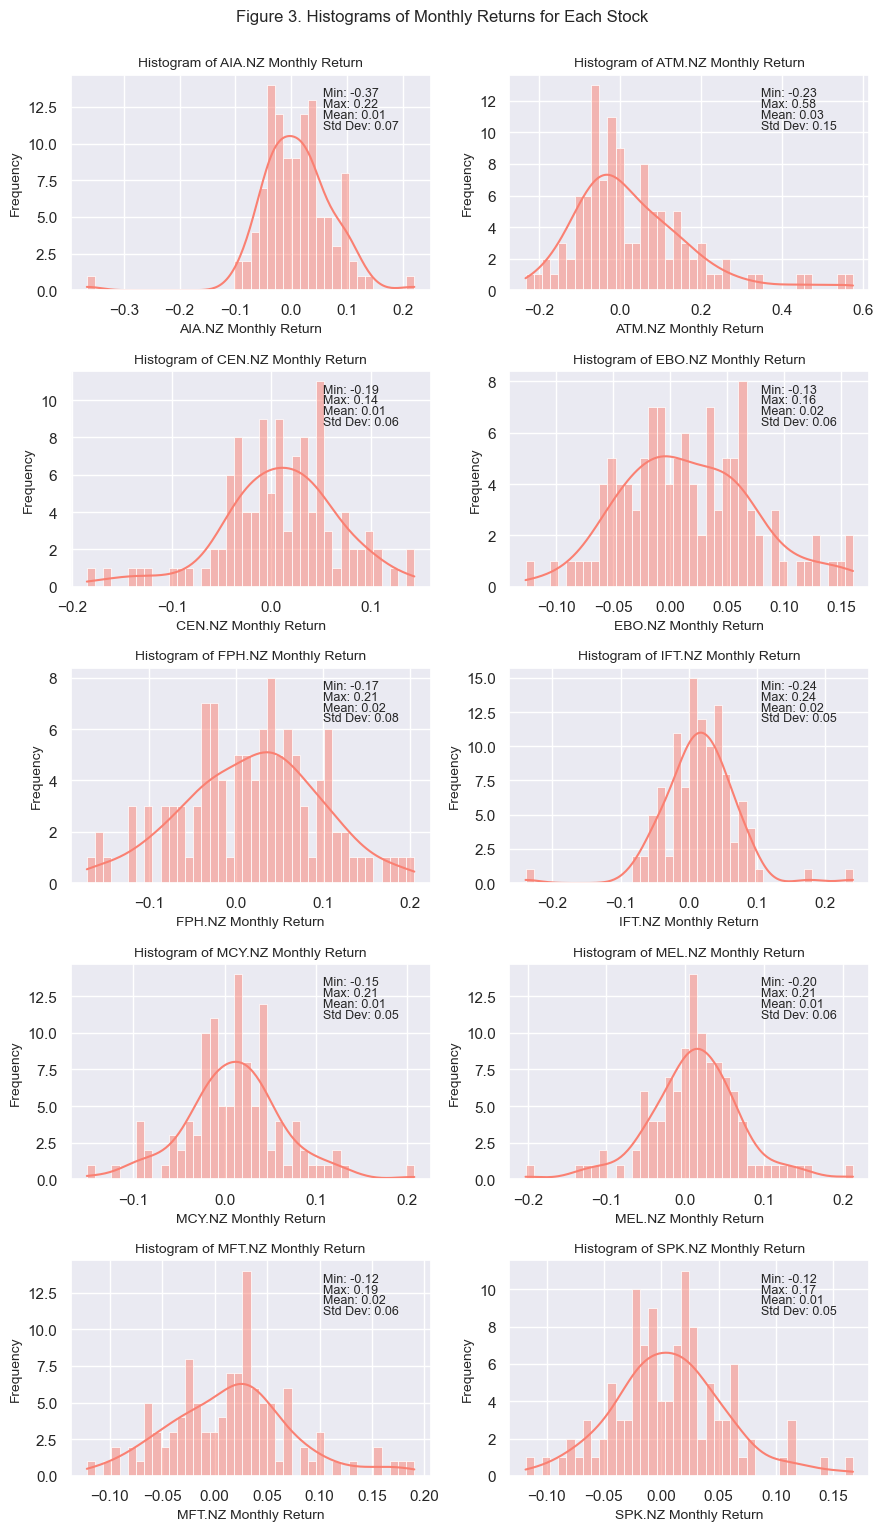

In [12]:
# Create a function to find each stock in a dataframe and plot in the corresponding subplot.
def plot_stock_histograms(data):
    # Set up a figure with subplots in a 5 rows x 2 columns grid
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(9, 15))
    axes = axes.flatten()  

    # Loop through each stock and plot in the corresponding subplot
    for i, stock in enumerate(data.columns):
        ax = axes[i]  
        # Calculate basic statistics for the stock
        min_val = data[stock].min()
        max_val = data[stock].max()
        mean_val = data[stock].mean()
        std_val = data[stock].std()

        # Plot histogram with seaborn
        sns.histplot(data[stock], kde=True, bins=40, color='salmon', ax=ax)
        ax.set_xlabel(f"{stock} Monthly Return", fontsize=10)
        ax.set_ylabel("Frequency", fontsize=10)
        ax.set_title(f"Histogram of {stock} Monthly Return", fontsize=10)

        # Display statistics on the subplot
        ax.text(0.7, 0.9, f"Min: {min_val:.2f}", transform=ax.transAxes, fontsize=9)
        ax.text(0.7, 0.85, f"Max: {max_val:.2f}", transform=ax.transAxes, fontsize=9)
        ax.text(0.7, 0.8, f"Mean: {mean_val:.2f}", transform=ax.transAxes, fontsize=9)
        ax.text(0.7, 0.75, f"Std Dev: {std_val:.2f}", transform=ax.transAxes, fontsize=9)

    # Adjust the layout 
    plt.tight_layout()
    plt.suptitle("Figure 3. Histograms of Monthly Returns for Each Stock", fontsize=12, y=1.02)
    plt.show()

# Use the function on the DataFrame
plot_stock_histograms(df_return)

**b. Compare the individual stock performance**

To evaluate the stock performance, we will construct a dataframe that includes the monthly Return and Risk for each stock over this period, and then annualize these numbers. The 'summary' dataframe displays the monthly mean return and standard deviation of returns across stocks, which are then annualized by multiplying by 12 months.

In [13]:
summary = df_return.agg(['mean', 'std']).T
summary

,mean,std
AIA.NZ,0.008892,0.066028
ATM.NZ,0.032308,0.146435
CEN.NZ,0.008783,0.059333
EBO.NZ,0.016261,0.057455
FPH.NZ,0.018154,0.078099
IFT.NZ,0.015710,0.054097
MCY.NZ,0.010464,0.054585
MEL.NZ,0.012110,0.059710
MFT.NZ,0.016367,0.059713
SPK.NZ,0.007532,0.049095


The 'summary' dataframe then represents the annualized mean return and standard deviation of returns across various stocks. 

In [14]:
summary.columns = ['Return', 'Risk']
summary.Return = summary.Return * 12
summary.Risk = summary.Risk * np.sqrt(12)
summary

,Return,Risk
AIA.NZ,0.106705,0.228726
ATM.NZ,0.387695,0.507266
CEN.NZ,0.105392,0.205536
EBO.NZ,0.195135,0.199028
FPH.NZ,0.217845,0.270543
IFT.NZ,0.188520,0.187396
MCY.NZ,0.125570,0.189088
MEL.NZ,0.145319,0.206843
MFT.NZ,0.196407,0.206852
SPK.NZ,0.090387,0.170069


The graph below shows the relationship between return and risk among the stocks.

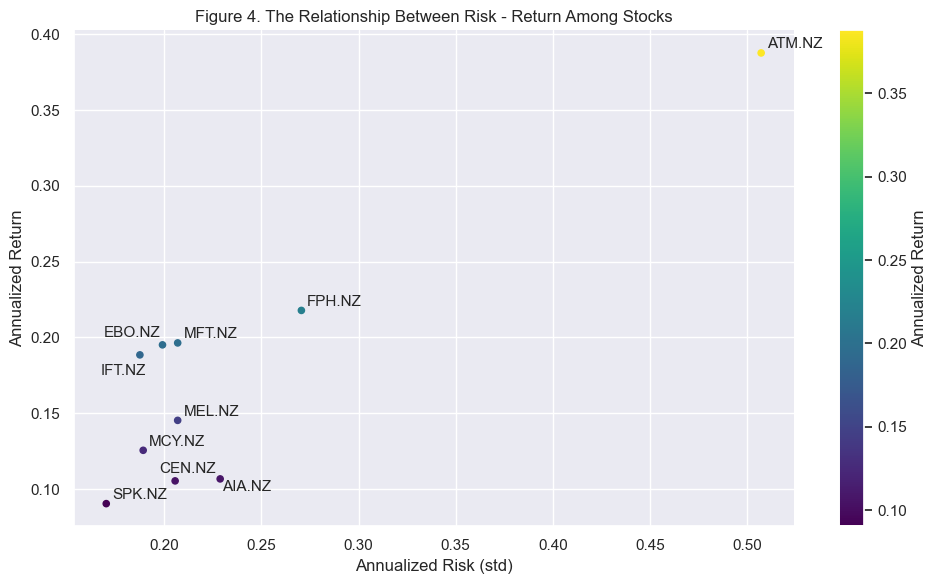

In [15]:
# The relationship between return and risk among the stocks.
plt.figure(figsize=(10, 6))
scatter = plt.scatter(summary['Risk'], summary['Return'], s=20, c=summary['Return'], cmap='viridis')

# Add annotations with specific adjustments 
for i in summary.index:
    # Set default offsets
    x_offset, y_offset = 0.003, 0.003

    # Apply specific adjustments
    if i == 'EBO.NZ':
        x_offset = - 0.03  
        y_offset = + 0.005  
    elif i == 'IFT.NZ':
        x_offset = - 0.02  
        y_offset = - 0.013 
    elif i == 'AIA.NZ':
        x_offset = + 0.001  
        y_offset = - 0.008 
    elif i == 'CEN.NZ':
        x_offset = - 0.008  
        y_offset = + 0.005 

    # Annotate the scatter plot
    plt.annotate(i, 
                 xy=(summary.loc[i, 'Risk'], summary.loc[i, 'Return']),
                 xytext=(summary.loc[i, 'Risk'] + x_offset, summary.loc[i, 'Return'] + y_offset),
                 textcoords='data',
                 fontsize=11)

# Add a color bar
cbar = plt.colorbar(scatter, label='Annualized Return')
cbar.ax.tick_params(labelsize=11)

# Label axes and title
plt.xlabel('Annualized Risk (std)', fontsize=12)
plt.ylabel('Annualized Return', fontsize=12)
plt.title('Figure 4. The Relationship Between Risk - Return Among Stocks', fontsize=12)

# Improve layout and aesthetics
sns.despine()
plt.tight_layout()
plt.show()

Using the Mean-Variance approach, it is necessary to compute the ratio between return and risk for each stock to evaluate its performance. This is done by calculating the Sharpe ratio, represented by $\frac{E(R_{P})-R_{f}}{\sigma_{P}}$, where $E(R_{P})$ is the expected return of the stock/portfolio, $R_{f}$ is the risk-free rate, and $\sigma_{P}$ is the standard deviation of the stock/portfolio’s returns. For the risk-free rate, the 10-year government bond has been chosen, with the average annual rates of these bonds from January 2015 to April 2024 standing at 2.8%, as calculated from data provided by the Reserve Bank of New Zealand.

In [16]:
# Risk-free rate (10-year bond's New Zealand goverment from Jan 2015 to April 2024)
risk_free_return = 0.028

# Risk-free risk
risk_free_risk = 0

rf = [risk_free_return, risk_free_risk]
rf

[0.028, 0]

In [17]:
# Calculate the Sharpe ratio for each stock.
summary['Sharpe'] = (summary['Return'].sub(rf[0])) / summary['Risk']
summary.sort_values(by='Sharpe', ascending=False)

,Return,Risk,Sharpe
IFT.NZ,0.188520,0.187396,0.856583
EBO.NZ,0.195135,0.199028,0.839755
MFT.NZ,0.196407,0.206852,0.814142
ATM.NZ,0.387695,0.507266,0.709086
FPH.NZ,0.217845,0.270543,0.701719
MEL.NZ,0.145319,0.206843,0.567188
MCY.NZ,0.125570,0.189088,0.516003
CEN.NZ,0.105392,0.205536,0.376538
SPK.NZ,0.090387,0.170069,0.366831
AIA.NZ,0.106705,0.228726,0.344102


It is evident that among the stocks, Infratil (IFT.NZ) stands out as the top performer, boasting the highest return-to-risk ratio, or Sharpe ratio of 0.8566. Conversely, Auckland International Airport (AIA.NZ) ranks as the poorest performer, attributed to its lowest Sharpe ratio of 0.3441.

### 2.4 Analyze the performance of investment portfolios

#### 2.4.1 Create the equally weighted portfolio (EWP)

To develop a function that calculates the portfolio's annualized risk and return, the simple case of equally weighted portfolio is firstly considered. After building equally weighted portfolio, we will create a dataframe showing monthly mean return and standard deviation return of each constituents in portfolio. Then, we will calculate the annualized mean return and standard deviation of portfolio and develop a function to calculate the annualized portfolio's risk and return from its monthly mean return and standard deviation return.

In [18]:
# The number of assets (stocks)
noa = len(df_return.columns)
noa

10

In [19]:
# The equal weight for portfolio.
e_weight = [1 / noa for i in range(noa)]
e_weight

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [20]:
# Create the return dataframe with equally weighted portfolio.
df_return_ewp = df_return.mul(e_weight, axis = 'columns')
df_return_ewp['EWP'] = df_return_ewp.sum(axis = 1)
display(df_return_ewp.head(3))
display(df_return_ewp.tail(3))

,AIA.NZ,ATM.NZ,CEN.NZ,EBO.NZ,FPH.NZ,IFT.NZ,MCY.NZ,MEL.NZ,MFT.NZ,SPK.NZ,EWP
Date,,,,,,,,,,,
2015-02-01,-0.002247,0.005556,-0.012588,0.009206,0.010306,-0.000633,0.001786,0.010559,0.001250,-0.000909,0.022285
2015-03-01,0.003448,-0.001754,-0.003236,0.003682,-0.003942,0.001274,-0.009357,-0.005431,-0.004506,-0.008869,-0.028690
2015-04-01,0.004134,-0.007143,-0.003295,-0.009032,-0.001216,-0.001887,-0.001277,-0.000052,-0.000452,0.002605,-0.017615


,AIA.NZ,ATM.NZ,CEN.NZ,EBO.NZ,FPH.NZ,IFT.NZ,MCY.NZ,MEL.NZ,MFT.NZ,SPK.NZ,EWP
Date,,,,,,,,,,,
2024-02-01,-0.003972,0.020388,0.000000,-0.001598,0.003507,-0.002414,-0.001037,0.007748,-0.005495,-0.004610,0.012518
2024-03-01,0.003086,0.009355,0.009058,-0.005841,0.004694,0.005626,0.003743,-0.001171,0.002863,-0.006016,0.025397
2024-04-01,-0.005204,-0.001327,0.000231,0.002365,0.010994,0.000275,-0.006684,0.002583,-0.002439,0.002883,0.003677


Next, we will calculate annualized mean return and standard deviation return of stocks and equally weighted portfolio.

In [21]:
# Create the dataframe showing monthly mean return and standard deviation return of each constituents in portfolio.
summary_ewp = df_return_ewp.agg(['mean', 'std']).T
summary_ewp

,mean,std
AIA.NZ,0.000889,0.006603
ATM.NZ,0.003231,0.014644
CEN.NZ,0.000878,0.005933
EBO.NZ,0.001626,0.005745
FPH.NZ,0.001815,0.007810
IFT.NZ,0.001571,0.005410
MCY.NZ,0.001046,0.005459
MEL.NZ,0.001211,0.005971
MFT.NZ,0.001637,0.005971
SPK.NZ,0.000753,0.004909


In [22]:
# Annualized mean return and standard deviation of portfolio.
summary_ewp.columns = ['Return', 'Risk']
summary_ewp.Return = summary_ewp.Return * 12
summary_ewp.Risk = summary_ewp.Risk * np.sqrt(12)
summary_ewp

,Return,Risk
AIA.NZ,0.010671,0.022873
ATM.NZ,0.038770,0.050727
CEN.NZ,0.010539,0.020554
EBO.NZ,0.019514,0.019903
FPH.NZ,0.021785,0.027054
IFT.NZ,0.018852,0.018740
MCY.NZ,0.012557,0.018909
MEL.NZ,0.014532,0.020684
MFT.NZ,0.019641,0.020685
SPK.NZ,0.009039,0.017007


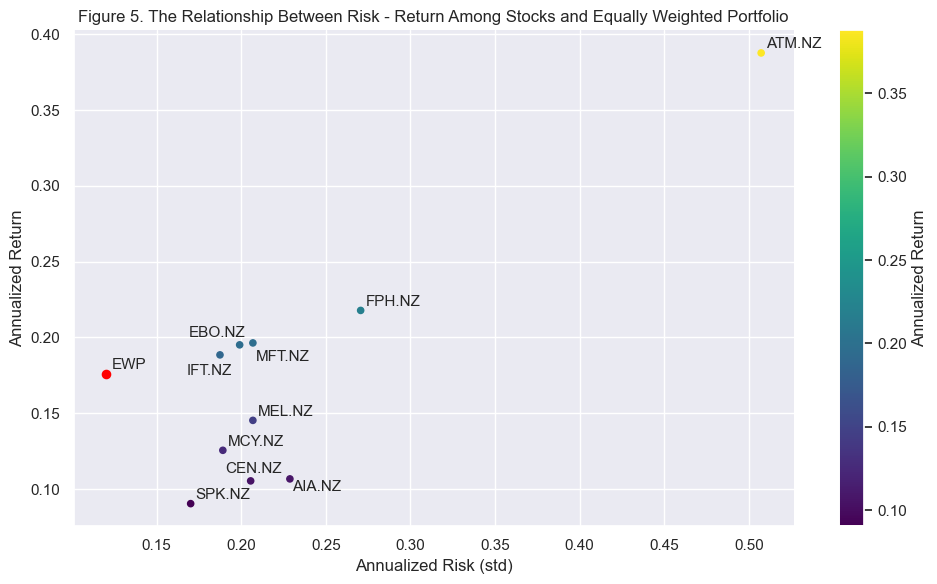

In [23]:
# Plot the relationship between return and risk of stocks and equally weighted portfolio.
plt.figure(figsize=(10, 6))
plt.scatter(summary_ewp.loc['EWP', 'Risk'], summary_ewp.loc['EWP':, 'Return'], s = 35, color = 'red')
for i in summary_ewp.index:
  plt.annotate(i, xy = (summary_ewp.loc[i, 'Risk']+0.003, summary_ewp.loc[i, 'Return']+0.003), size = 11)

scatter = plt.scatter(summary['Risk'], summary['Return'], s=20, c=summary['Return'], cmap='viridis')
# Add annotations with specific adjustments 
for i in summary.index:
    # Set default offsets
    x_offset, y_offset = 0.003, 0.003

    # Apply specific adjustments
    if i == 'EBO.NZ':
        x_offset = - 0.03  
        y_offset = + 0.005  
    elif i == 'IFT.NZ':
        x_offset = - 0.02  
        y_offset = - 0.013 
    elif i == 'AIA.NZ':
        x_offset = + 0.001  
        y_offset = - 0.008 
    elif i == 'CEN.NZ':
        x_offset = - 0.015  
        y_offset = + 0.005 
    elif i == 'MFT.NZ':
        x_offset = + 0.002 
        y_offset = - 0.012

    # Annotate the scatter plot
    plt.annotate(i, 
                 xy=(summary.loc[i, 'Risk'], summary.loc[i, 'Return']),
                 xytext=(summary.loc[i, 'Risk'] + x_offset, summary.loc[i, 'Return'] + y_offset),
                 textcoords='data',
                 fontsize=11)

# Add a color bar
cbar = plt.colorbar(scatter, label='Annualized Return')
cbar.ax.tick_params(labelsize=11)

# Label axes and title
plt.xlabel('Annualized Risk (std)', fontsize=12)
plt.ylabel('Annualized Return', fontsize=12)
plt.title('Figure 5. The Relationship Between Risk - Return Among Stocks and Equally Weighted Portfolio', fontsize=12)

# Improve layout and aesthetics
sns.despine()
plt.tight_layout()
plt.show()

A function to calculate the annualized portfolio's risk and return from its monthly mean return and standard deviation return is developed.

In [24]:
# A function to annualize risk and return from monthly mean return and standard deviation return.
def ann_risk_return(df_return):
  ''' Annualize risk and return'''
  summary = df_return.agg(['mean', 'std']).T
  summary.columns = ['Return', 'Risk']
  summary.Return = summary.Return * 12
  summary.Risk = summary.Risk * np.sqrt(12)
  return summary

#### 2.4.2 Create randomly weighted portfolios

By generating randomly the proportions of each stock constituted in each portfolio, we can create many random portfolios consisting of ten stocks. The proportions or the weights of all ten stocks have to sum up to one. The steps to create randomly the weights for stocks in each portfolio are as follows.

* Create the matrix in which the number of rows is the number of portfolios; the number of column is the number of assets (stocks). First, the random method returns a random floats in the half-open interval between zero and one. We have `nop` portfolios (for example, 5) and `noa` assets (for example, 10) for each portfolio, so we have `nop` * `noa` random floats between zero and one (for example, 50). After that, we can reshape this array to have `nop` rows (for example, 5 rows), for each row we have `noa` elements (for example, 10 elements for 10 assets).
* The weights of stocks have the sum of 1 in each portfolio, so for each row in the matrix created above, we devide each element in one row by its row sum value.
* Apply the `dot` method in Numpy in the return dataframe to perform the weights in each portfolio under form of two arrays.

In [25]:
# The number of portfolios.
nop = 100000
nop

100000

In [26]:
# Generate the matrix including 'nop' rows and 'noa' elements for each row.
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop , noa)
matrix

array([[0.69646919, 0.28613933, 0.22685145, ..., 0.68482974, 0.4809319 ,
        0.39211752],
       [0.34317802, 0.72904971, 0.43857224, ..., 0.17545176, 0.53155137,
        0.53182759],
       [0.63440096, 0.84943179, 0.72445532, ..., 0.22826323, 0.29371405,
        0.63097612],
       ...,
       [0.20944834, 0.46024677, 0.9266681 , ..., 0.55802798, 0.73645099,
        0.23039054],
       [0.68970075, 0.15929878, 0.9183601 , ..., 0.55910512, 0.38657061,
        0.77964557],
       [0.77612088, 0.48068056, 0.93870341, ..., 0.65788641, 0.45794761,
        0.4468602 ]])

In [27]:
# Calculate the sum for each row.
matrix.sum(axis = 1, keepdims = True)

array([[5.44199353],
       [4.12783997],
       [5.37945594],
       ...,
       [5.31724329],
       [5.60888324],
       [7.13215784]])

In [28]:
# Generate randomly the weights for portfolios.
weights = matrix / matrix.sum(axis = 1, keepdims = True)
weights

array([[0.12798052, 0.05257987, 0.04168536, ..., 0.1258417 , 0.08837421,
        0.07205402],
       [0.08313743, 0.17661773, 0.1062474 , ..., 0.0425045 , 0.12877228,
        0.1288392 ],
       [0.11793032, 0.15790292, 0.13467074, ..., 0.0424324 , 0.05459921,
        0.11729367],
       ...,
       [0.0393904 , 0.0865574 , 0.17427604, ..., 0.10494686, 0.13850241,
        0.04332894],
       [0.12296579, 0.02840116, 0.16373315, ..., 0.09968207, 0.06892114,
        0.13900193],
       [0.10881992, 0.06739623, 0.13161563, ..., 0.09224227, 0.06420884,
        0.06265428]])

In [29]:
# Double check whether the weights equal to 1.
weights.sum(axis = 1, keepdims = True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [30]:
# Apply 'dot' method in the return dataframe.
port_return = df_return.dot(weights.T)
display(port_return.head(3))
display(port_return.tail(3))

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-01,0.034213,0.010422,0.018385,0.033170,0.036991,0.026128,0.023568,0.012180,0.020413,0.031752,...,0.015584,0.013710,0.037400,0.006894,0.036774,0.007266,0.026762,0.014483,0.010627,0.019909
2015-03-01,-0.032418,-0.028335,-0.024868,-0.038042,-0.035253,-0.034472,-0.030247,-0.028462,-0.023911,-0.013035,...,-0.038747,-0.027871,-0.023367,-0.042062,-0.029229,-0.028996,-0.018804,-0.036414,-0.038794,-0.024584
2015-04-01,-0.012953,-0.016344,-0.021939,-0.019001,-0.007459,-0.024758,-0.019674,-0.032501,-0.023290,-0.026174,...,-0.007519,-0.012767,-0.028757,-0.011198,-0.027000,-0.017359,-0.016415,-0.023826,-0.011361,-0.019556


,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-01,0.006481,0.021362,0.023138,0.014948,0.005983,0.026115,0.015897,0.026057,0.020498,0.031907,...,0.022668,-0.006349,0.036003,-0.009321,0.031553,0.013646,0.021344,0.012151,-0.001538,0.008528
2024-03-01,0.020774,0.039545,0.030184,0.018874,0.014237,0.026598,0.025453,0.025752,0.039480,0.029887,...,0.028258,0.009322,0.030827,0.034165,0.030112,0.030922,0.034072,0.032004,0.019733,0.027821
2024-04-01,0.001010,0.003727,0.008345,0.007229,0.013613,0.003568,0.006593,-0.002564,0.014512,0.007695,...,-0.005427,-0.007617,0.007364,0.003148,0.007107,-0.012567,0.003138,-0.003732,0.000448,0.005449


In [31]:
# Call the function to annualize risk and return ('ann_risk_return' is built in Part 2.4.1)
port_summary = ann_risk_return(port_return)
port_summary

,Return,Risk
0,0.166449,0.122638
1,0.194740,0.133693
2,0.186670,0.126779
3,0.178740,0.123523
4,0.158598,0.125103
...,...,...
99995,0.171255,0.127336
99996,0.183194,0.129455
99997,0.171866,0.123370
99998,0.145900,0.123404


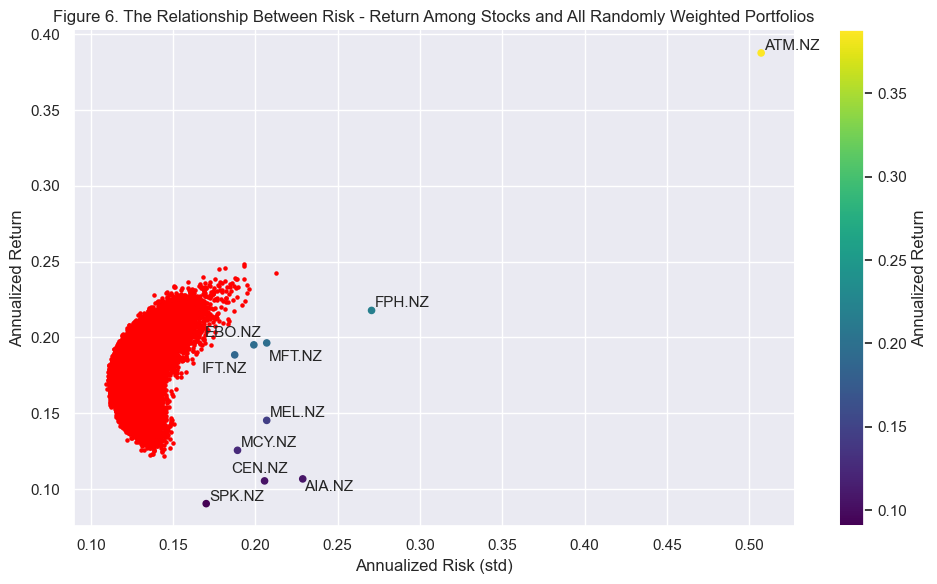

In [32]:
# Plot all random portfolios.
plt.figure(figsize = (10, 6))
plt.scatter(port_summary.loc[:, 'Risk'], port_summary.loc[:, 'Return'], s = 5, color = 'red')

#Plot all stocks
scatter = plt.scatter(summary['Risk'], summary['Return'], s=20, c=summary['Return'], cmap='viridis')
# Add annotations with specific adjustments 
for i in summary.index:
    # Set default offsets
    x_offset, y_offset = 0.002, 0.002

    # Apply specific adjustments
    if i == 'EBO.NZ':
        x_offset = - 0.03  
        y_offset = + 0.005  
    elif i == 'IFT.NZ':
        x_offset = - 0.02  
        y_offset = - 0.012
    elif i == 'AIA.NZ':
        x_offset = + 0.001  
        y_offset = - 0.008 
    elif i == 'CEN.NZ':
        x_offset = - 0.02  
        y_offset = + 0.005 
    elif i == 'MFT.NZ':
        x_offset = + 0.001  
        y_offset = - 0.012 

    # Annotate the scatter plot
    plt.annotate(i, 
                 xy=(summary.loc[i, 'Risk'], summary.loc[i, 'Return']),
                 xytext=(summary.loc[i, 'Risk'] + x_offset, summary.loc[i, 'Return'] + y_offset),
                 textcoords='data',
                 fontsize=11)

# Add a color bar
cbar = plt.colorbar(scatter, label='Annualized Return')
cbar.ax.tick_params(labelsize=11)

# Label axes and title
plt.xlabel('Annualized Risk (std)', fontsize=12)
plt.ylabel('Annualized Return', fontsize=12)
plt.title('Figure 6. The Relationship Between Risk - Return Among Stocks and All Randomly Weighted Portfolios', fontsize=12)

# Improve layout and aesthetics
sns.despine()
plt.tight_layout()
plt.show()

#### 2.4.3 Find the Optimal portfolio

The Sharpe ratio is a tool for comparing both individual stock performance and overall portfolio performance. The optimal portfolio is identified as the one with the highest Sharpe ratio, indicating superior risk-adjusted returns.

In [33]:
# Calculate the Sharpe ratio for each random portfolio.
port_summary['Sharpe'] = (port_summary['Return'].sub(rf[0])) / port_summary['Risk']
port_summary

,Return,Risk,Sharpe
0,0.166449,0.122638,1.128917
1,0.194740,0.133693,1.247192
2,0.186670,0.126779,1.251545
3,0.178740,0.123523,1.220338
4,0.158598,0.125103,1.043926
...,...,...,...
99995,0.171255,0.127336,1.125021
99996,0.183194,0.129455,1.198830
99997,0.171866,0.123370,1.166127
99998,0.145900,0.123404,0.955404


In [34]:
# Descriptive statistics of random portfolios.
port_summary.describe()

,Return,Risk,Sharpe
count,100000.000000,100000.000000,100000.000000
mean,0.175933,0.127399,1.162343
std,0.015819,0.007966,0.112085
min,0.122092,0.109338,0.650768
25%,0.164406,0.121950,1.092675
50%,0.175934,0.126106,1.175601
75%,0.186911,0.131292,1.243307
max,0.248368,0.212716,1.467300


Text(0.5, 1.0, 'Figure 7. The relationship Between Risk - Return Among Stocks and All Randomly Weighted Portfolios, \nAdjusted color by Sharpe ratio')

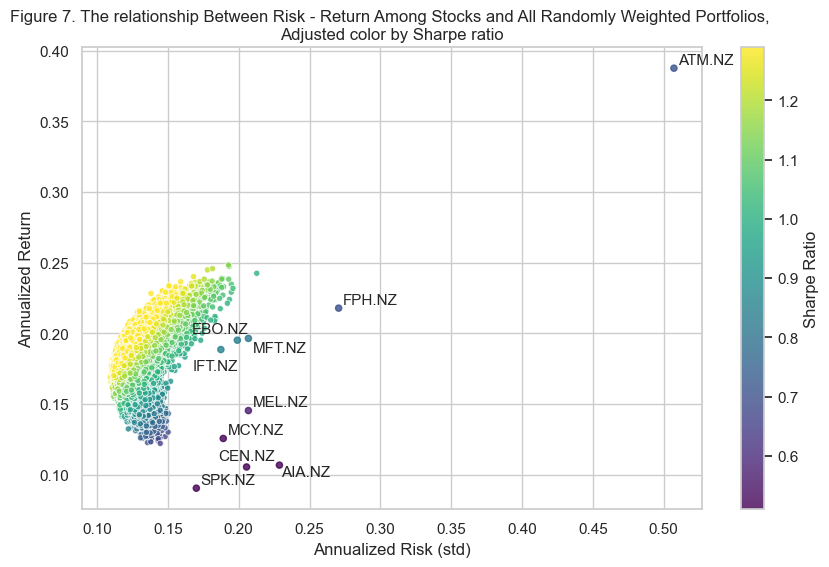

In [35]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Plot all portfolios
plt.scatter(port_summary['Risk'], port_summary['Return'], s=20,
                 c=port_summary['Sharpe'], cmap='viridis', vmin=0.51, vmax=1.29, alpha=0.8, edgecolors='w', linewidth=0.6)

plt.scatter(summary.loc[:, 'Risk'], summary.loc[:, 'Return'], s = 20, 
            c = summary.loc[:,'Sharpe'], cmap = 'viridis', vmin = 0.51, vmax = 1.29, alpha = 0.8)

# Add annotations with specific adjustments 
for i in summary.index:
    # Set default offsets
    x_offset, y_offset = 0.003, 0.003

    # Apply specific adjustments
    if i == 'EBO.NZ':
        x_offset = - 0.032  
        y_offset = + 0.0051  
    elif i == 'IFT.NZ':
        x_offset = - 0.02  
        y_offset = - 0.015 
    elif i == 'AIA.NZ':
        x_offset = + 0.001  
        y_offset = - 0.008 
    elif i == 'CEN.NZ':
        x_offset = - 0.02  
        y_offset = + 0.005 
    elif i == 'MFT.NZ':
        x_offset = + 0.003  
        y_offset = - 0.01

    # Annotate the scatter plot
    plt.annotate(i, 
                 xy=(summary.loc[i, 'Risk'], summary.loc[i, 'Return']),
                 xytext=(summary.loc[i, 'Risk'] + x_offset, summary.loc[i, 'Return'] + y_offset),
                 textcoords='data',
                 fontsize=11)

# Adding a colorbar
cbar = plt.colorbar()
cbar.set_label('Sharpe Ratio')

# Labels and title with adjusted fontsize
plt.xlabel('Annualized Risk (std)', fontsize=12)
plt.ylabel('Annualized Return', fontsize=12)
plt.title('Figure 7. The relationship Between Risk - Return Among Stocks and All Randomly Weighted Portfolios, \nAdjusted color by Sharpe ratio',
          fontsize=12)

To find the optimal portfolio or the portfolio with the highest Sharpe ratio, the `idxmax()` method will be used to return a series with the index of the maximum value for each column.

In [36]:
# The portfolio with the maximum Sharpe ratio.
msrp = port_summary.Sharpe.idxmax()
msrp

42171

There are 100,000 portfolios and the portfolio with the index of 42171 has the highest Sharpe ratio of 1.4673. This very best portfolio gives an annualized return of 20.842% and a risk in term of standard deviation of 12.3%.

In [37]:
# Risk and return of the optimal portfolio.
msrp_p = port_summary.iloc[msrp]
msrp_p

Return    0.208419
Risk      0.122960
Sharpe    1.467300
Name: 42171, dtype: float64

Next step is to select the row with the maximum Sharpe ratio in the portfolio summary dataframe to get the information on the weight of the optimal portfolio.

In [38]:
# The proportions of each asset in the optimal portfolio.
msrp_w = weights[msrp, :]
msrp_w

array([2.09253058e-02, 1.48895880e-01, 1.14703154e-02, 1.89564775e-01,
       1.22488864e-01, 1.89340269e-01, 6.59518124e-05, 1.02571333e-02,
       1.75770299e-01, 1.31221208e-01])

In [39]:
# The stock list with its proportion or weight in the optimal portfolio as follows.
opt_weights = pd.Series(index = adj_close.columns, data = msrp_w)
opt_weights.sort_values(ascending=False)

EBO.NZ    0.189565
IFT.NZ    0.189340
MFT.NZ    0.175770
ATM.NZ    0.148896
SPK.NZ    0.131221
FPH.NZ    0.122489
AIA.NZ    0.020925
CEN.NZ    0.011470
MEL.NZ    0.010257
MCY.NZ    0.000066
dtype: float64

In the optimal portfolio, EBO.NZ holds 18.96%, IFT.NZ has 18.93%, MFT.NZ comprises 17.58%, ATM.NZ accounts for 14.89%, SPK.NZ represents 13.12%, and FPH.NZ makes up 12.25%. The remaining stocks, such as AIA.NZ, CEN.NZ, and MEL.NZ, have very small proportions, ranging from 1% to 2%, while MCY.NZ approaches nearly zero percent.

In [40]:
# Create monthly return dataframe with optimal portfolio.
df_return['Optimal_Portfolio'] = df_return.dot(opt_weights)
df_return.head()

,AIA.NZ,ATM.NZ,CEN.NZ,EBO.NZ,FPH.NZ,IFT.NZ,MCY.NZ,MEL.NZ,MFT.NZ,SPK.NZ,Optimal_Portfolio
Date,,,,,,,,,,,
2015-02-01,-0.022472,0.055556,-0.125884,0.092063,0.103060,-0.006329,0.017857,0.105590,0.012500,-0.009091,0.037324
2015-03-01,0.034483,-0.017544,-0.032362,0.036821,-0.039416,0.012739,-0.093567,-0.054307,-0.045062,-0.088685,-0.017819
2015-04-01,0.041337,-0.071429,-0.032954,-0.090322,-0.012158,-0.018868,-0.012772,-0.000517,-0.004525,0.026054,-0.029715
2015-05-01,0.052061,-0.067308,0.082746,0.056663,0.015385,0.057692,-0.011827,-0.079681,0.035714,-0.069023,0.011968
2015-06-01,0.017526,0.463917,-0.185366,0.017875,0.037879,-0.043939,-0.024476,-0.064935,-0.013793,0.010849,0.065356


In [41]:
# Annualize return and risk of portfolio and then calculate the Sharpe ratio.
summary = ann_risk_return(df_return)
summary['Sharpe'] = (summary['Return'].sub(rf[0])) / summary['Risk']
summary

,Return,Risk,Sharpe
AIA.NZ,0.106705,0.228726,0.344102
ATM.NZ,0.387695,0.507266,0.709086
CEN.NZ,0.105392,0.205536,0.376538
EBO.NZ,0.195135,0.199028,0.839755
FPH.NZ,0.217845,0.270543,0.701719
IFT.NZ,0.188520,0.187396,0.856583
MCY.NZ,0.125570,0.189088,0.516003
MEL.NZ,0.145319,0.206843,0.567188
MFT.NZ,0.196407,0.206852,0.814142
SPK.NZ,0.090387,0.170069,0.366831


Text(0.5, 1.0, 'Figure 8. The relationship Between Risk - Return Among Stocks, Randomly Weighted and Optimal Portfolios, \nAdjusted color by Sharpe ratio')

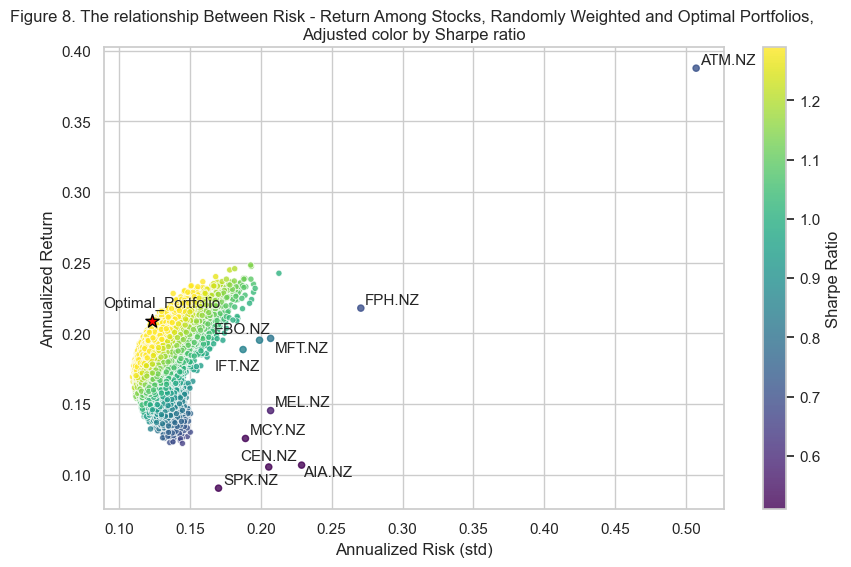

In [42]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Plot all random portfolios with Sharpe ratios, showing the optimal portfolio.
plt.figure(figsize=(10, 6))

# Plot all portfolios
sc = plt.scatter(port_summary['Risk'], port_summary['Return'], s=20,
                 c=port_summary['Sharpe'], cmap='viridis', vmin=0.51, vmax=1.29, alpha=0.8, edgecolors='w', linewidth=0.6)

plt.scatter(summary.loc[:, 'Risk'], summary.loc[:, 'Return'], s = 20,
            c = summary.loc[:,'Sharpe'], cmap = 'viridis', vmin = 0.51, vmax = 1.29, alpha = 0.8)

# Highlight optimal portfolio
plt.scatter(summary.loc['Optimal_Portfolio', 'Risk'], summary.loc['Optimal_Portfolio', 'Return'],
            s=100, marker='*', c='red', edgecolors='black', label='Optimal Portfolio')

# Add annotations with specific adjustments 
for i in summary.index:
    # Set default offsets
    x_offset, y_offset = 0.003, 0.003

    # Apply specific adjustments
    if i == 'EBO.NZ':
        x_offset = - 0.032  
        y_offset = + 0.0051  
    elif i == 'IFT.NZ':
        x_offset = - 0.02  
        y_offset = - 0.015 
    elif i == 'AIA.NZ':
        x_offset = + 0.001  
        y_offset = - 0.008 
    elif i == 'CEN.NZ':
        x_offset = - 0.02  
        y_offset = + 0.005 
    elif i == 'MFT.NZ':
        x_offset = + 0.003  
        y_offset = - 0.01
    elif i == 'Optimal_Portfolio':
        x_offset = - 0.034 
        y_offset = + 0.01

    # Annotate the scatter plot
    plt.annotate(i, 
                 xy=(summary.loc[i, 'Risk'], summary.loc[i, 'Return']),
                 xytext=(summary.loc[i, 'Risk'] + x_offset, summary.loc[i, 'Return'] + y_offset),
                 textcoords='data',
                 fontsize=11)

# Adding a colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Sharpe Ratio')

# Labels and title with adjusted fontsize
plt.xlabel('Annualized Risk (std)', fontsize=12)
plt.ylabel('Annualized Return', fontsize=12)
plt.title('Figure 8. The relationship Between Risk - Return Among Stocks, Randomly Weighted and Optimal Portfolios, \nAdjusted color by Sharpe ratio', fontsize=12)

Text(0.5, 1.0, 'Figure 9. The Randomly Weighted and Optimal Portfolios, Adjusted color by Sharpe ratio')

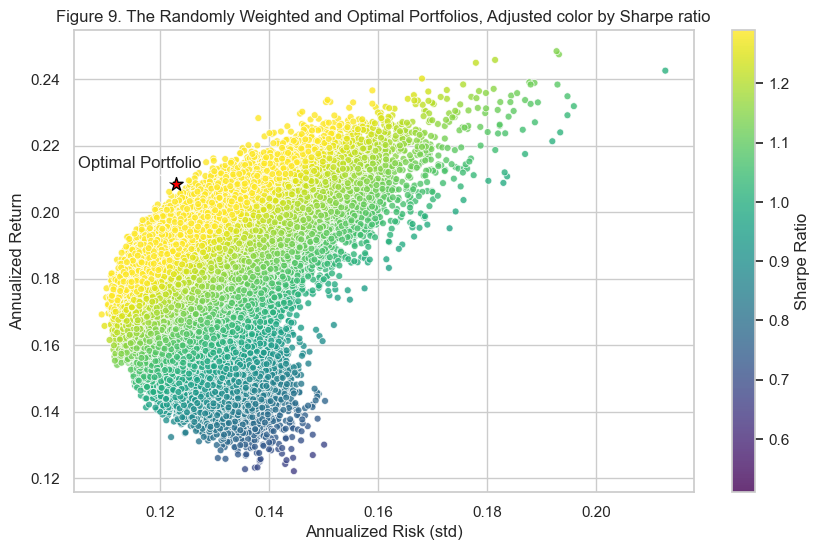

In [43]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Plot all random portfolios
sc = plt.scatter(port_summary['Risk'], port_summary['Return'], s=25,
                 c=port_summary['Sharpe'], cmap='viridis', vmin=0.51, vmax=1.29, alpha=0.8, edgecolors='w', linewidth=0.6)

# Highlight optimal portfolio
optimal_risk = summary.loc['Optimal_Portfolio', 'Risk']
optimal_return = summary.loc['Optimal_Portfolio', 'Return']
plt.scatter(optimal_risk, optimal_return,
            s=100, marker='*', color='red', edgecolors='black', label='Optimal Portfolio')

# Annotate the optimal portfolio
plt.annotate('Optimal Portfolio', 
             xy=(optimal_risk, optimal_return),
             xytext=(optimal_risk - 0.018, optimal_return + 0.005),  # Custom offset
             textcoords='data',
             fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

# Adding a colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Sharpe Ratio')

# Labels and title
plt.xlabel('Annualized Risk (std)', fontsize=12)
plt.ylabel('Annualized Return', fontsize=12)
plt.title('Figure 9. The Randomly Weighted and Optimal Portfolios, Adjusted color by Sharpe ratio', fontsize=12)

There are 100,000 portfolios and the *red star* is the maximum Sharpe Ratio portfolio or the best portfolio that derived with optimization algorithm.

## **3. Conclusion**

### 3.1 Things that go well

Overall, this project almost meets my initial objectives in the statement of intent. Thanks to Python and Yahoo! Finance, the data collection is remarkably quick, with simple command to process and taking only a few seconds to complete.

### 3.2 Challenges

In this project, a substantial amount of time, beyond the coding aspect, is spent for researching the underlying financial methodologies, such as why to choose between adjusted closing prices or closing prices, select either simple returns or log returns, and explore various approaches for finding optimal stock portfolios.

Another obstacle I encountered while attempting to plot interactive charts for historical prices in Google Colab. Initially, I used Google Colab to code with Python but when I installed `cufflinks` and `plotpy`, the interactive plots failed to function properly. A more effective solution I discovered was using Jupyter Notebook, which supports interactive plotting effectively.

### 3.3 Next future milestones

Given additional time, next developments will related to learn how to forecast the stock prices with a Monte Carlo Simulation, and find optimal investment portfolios through different more complicated approaches, such as the Capital Asset Pricing Model (CAPM).

## **References**

Alexeeva, V., & Francis, T. (2012). *Equity portfolio diversification: how many stocks are enough? Evidence from five developed markets.* FIRN Research Paper. https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2182295

Asesh, A. (2022). *Normalization and Bias in Time Series Data*. In: Biele, C., Kacprzyk, J., Kopeć, W., Owsiński, J.W., Romanowski, A., Sikorski, M. (eds) Digital Interaction and Machine Intelligence. MIDI 2021. Lecture Notes in Networks and Systems, vol 440. Springer, Cham. https://doi.org/10.1007/978-3-031-11432-8_8

Bodie, Z., Kane, A., Marcus, A. J. (2011). *Investments*. 9th Ed, McGraw-Hill Press/Irwin

Brailsford Tim, J.; Faff Robert, W. and Oliver, B. (1997). *Research design issues in the estimation of Beta*, McGraw-Hill Press, Sydney.

Koller, T., Goedhart, M., Wessels, D. (2010). *Valuation – Measuring and managing the value of companies*, John Wiley & Sons, Inc.

Somer Anderson. (2022). *What Is the Ideal Number of Stocks to Have in a Portfolio?* Investopedia. https://www.investopedia.com/ask/answers/05/optimalportfoliosize.asp

Statman, M. (1987). *How Many Stocks Make a Diversified Portfolio?* The Journal of Financial and Quantitative Analysis, 22(3), 353–363. https://doi.org/10.2307/2330969

Thompson, N. (1993). *The Mean-Variance Approach. In: Portfolio Theory and the Demand for Money*. Palgrave Macmillan, London. https://doi.org/10.1007/978-1-349-22827-0_2

**Data source:**


Simply Wall St. (2024, March 7). Largest New Zealand (NZX) Stocks by Market Cap. Simply Wall St. https://simplywall.st/stocks/nz/market-cap-large


Risk-free rate: Reserve Bank of New Zealand. https://www.rbnz.govt.nz/statistics/series/exchange-and-interest-rates/wholesale-interest-rates  

Monthly stock price and market capitalization of New Zealand Stock Exchange: Yahoo!Finance. https://nz.finance.yahoo.com/
